## Definición del problema

Desarrollar un modelo de clasificación eficiente para predecir con precisión el diagnóstico de anemia, empleando diferentes algoritmos de aprendizaje automático.

Dataset: https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification

## Carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/diagnosed_cbc_data_v4.csv')
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


No existe valores nulos en este conjunto de datos.

In [ ]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [ ]:
filas_duplicadas = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {filas_duplicadas}")

Cantidad de filas duplicadas: 49


In [ ]:
df = df.drop_duplicates()

Se procede a eliminar los valores duplicados.

## Exploración y Entendimiento de los Datos (EDA)

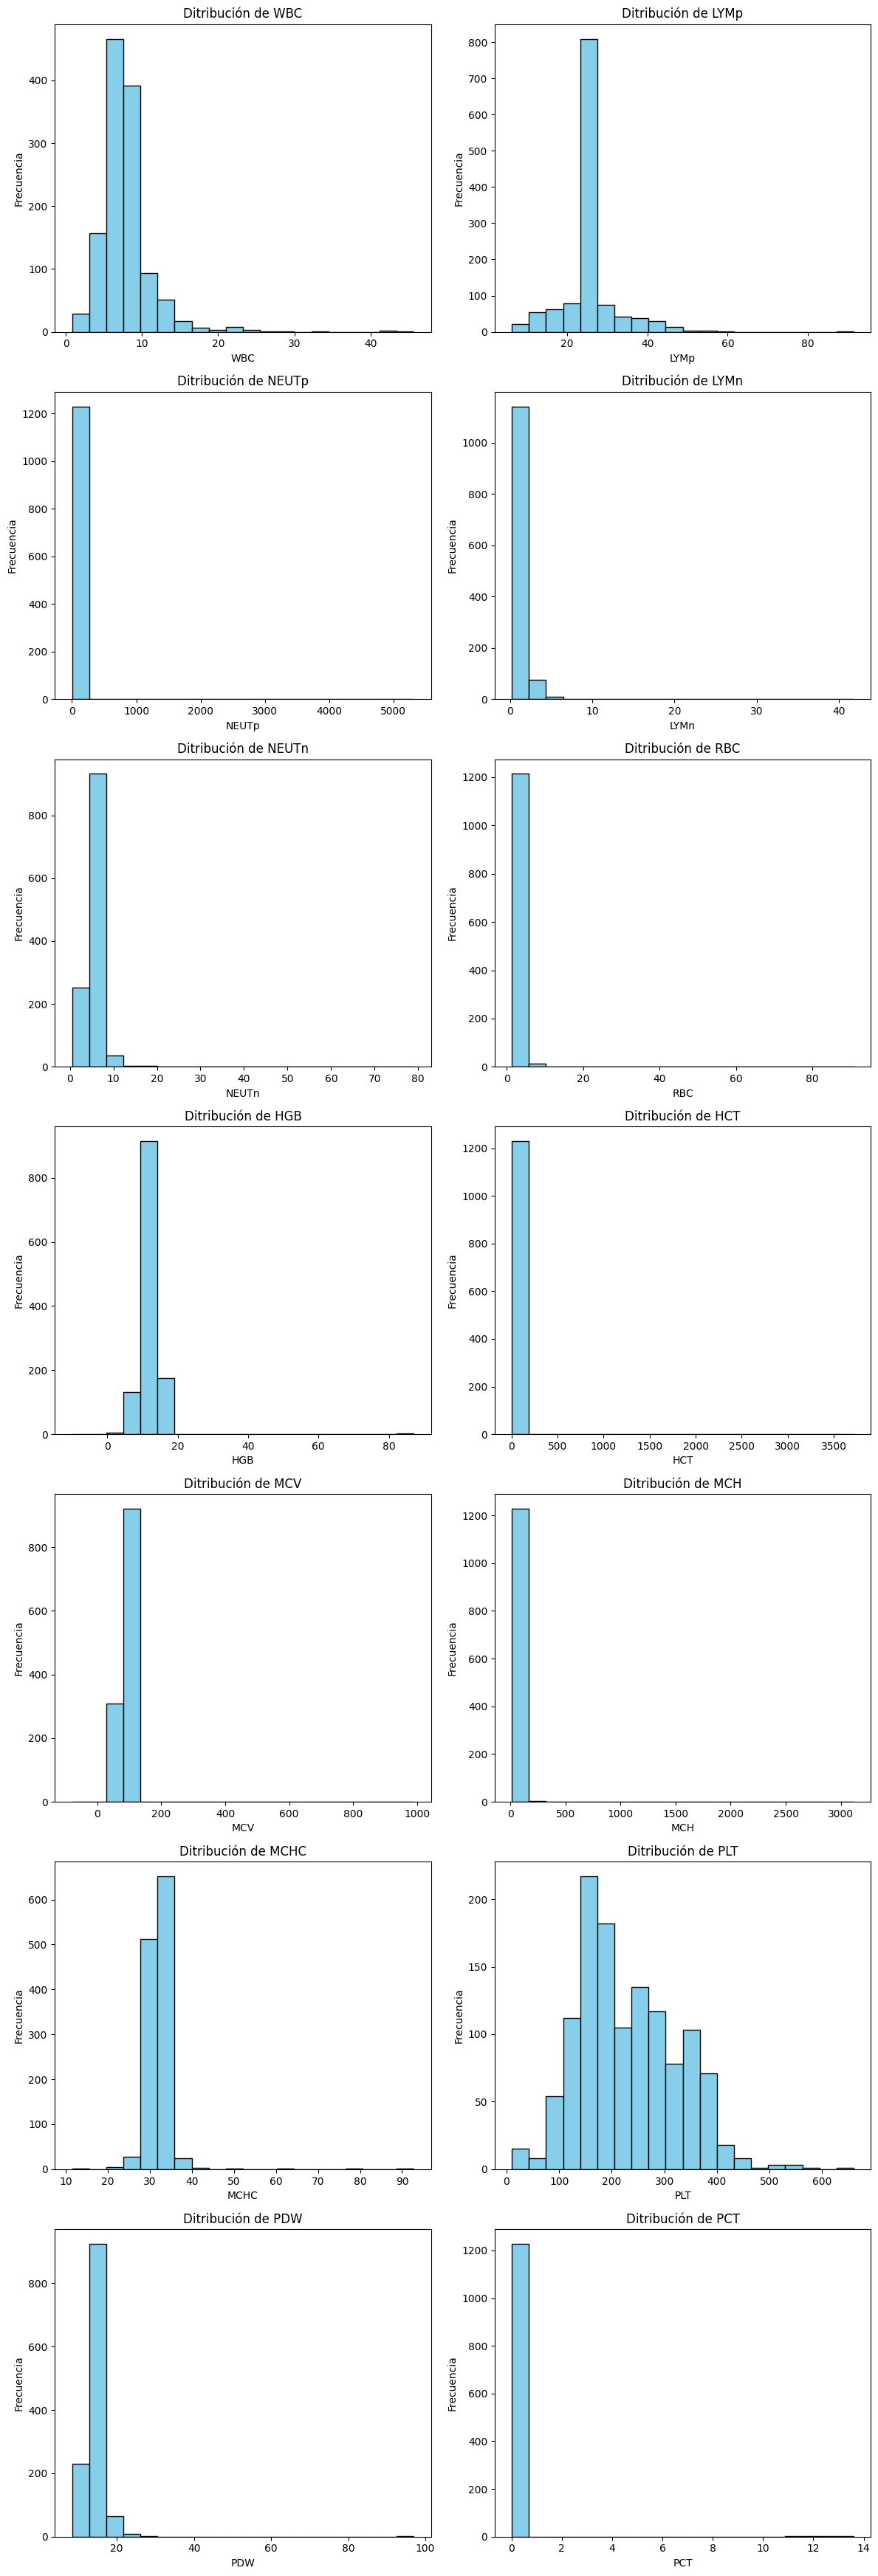

In [ ]:
columnas = [col for col in df.columns if col != 'Diagnosis']

columnas_por_fila = 2
total_columnas = len(columnas)
filas = -(-total_columnas // columnas_por_fila)

fig, axes = plt.subplots(filas, 2, figsize=(12, 5 * filas))
axes = axes.flatten()

for i, col in enumerate(columnas):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Ditribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La característica "PLT" muestra una mayor dispersión en su gráfica de distribución.

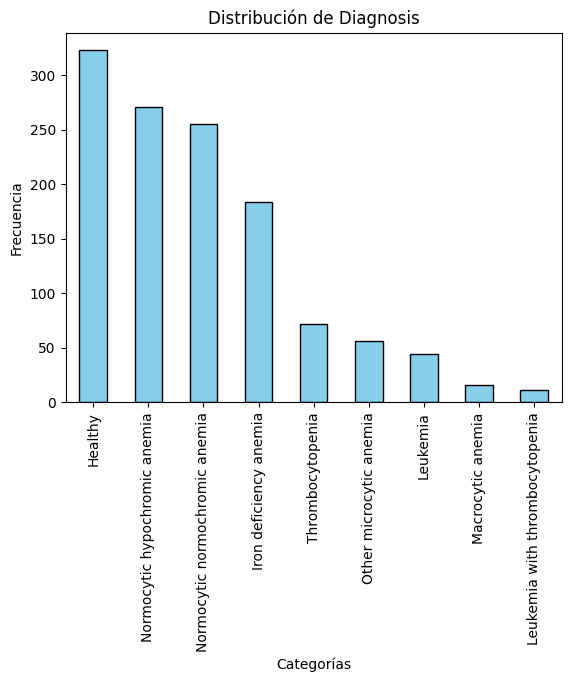

In [ ]:
df['Diagnosis'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribución de Diagnosis')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

- La categoría "Healthy" es la más frecuente, con más de 300 casos.
- "Normocytic hypochromic anemia" y "Normocytic normochromic anemia" también tienen una representación significativa, con más de 200 casos cada una.

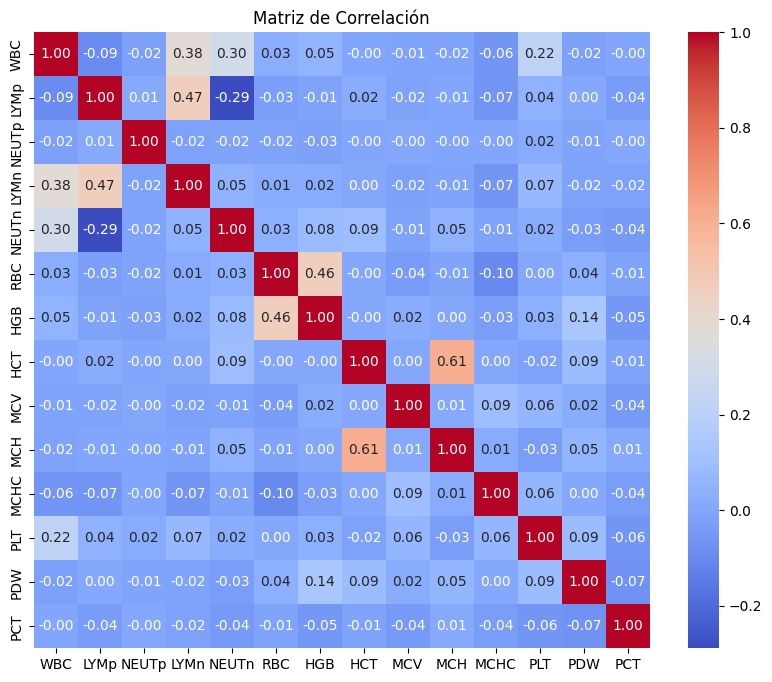

In [ ]:
correlation_matrix = df.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation analysis

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Matriz de Correlación')
plt.show()

## Modelamiento

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify = y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

Se evalua diferentes modelos de clasificación y se elige el modelo ideal para esta tarea. La comparación será basada a la métrica "accuracy".

In [ ]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('SVM', SVC(kernel='linear', random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(random_state=42, n_jobs=-1)),
    ('LightGBM', LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results.append([name, round(accuracy, 2)])

results = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                 Model  Accuracy
0        Decision Tree      1.00
1        Random Forest      0.98
2                  SVM      0.87
3  Logistic Regression      0.75
4                  KNN      0.68
5              XGBoost      0.98
6             LightGBM      0.98
7             CatBoost      1.00


Vemos que los modelos "Decision Tree" y "CatBoost" son los de mejor rendimiento. Entonces, aplicaremos validación cruzada para una evaluación más robusta.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

for name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    print(f"{name} Model")
    print(f"Accuracy per fold: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean()}")
    print(f"Standard Deviation: {cv_scores.std()}")
    print()

Decision Tree Model
Accuracy per fold: [0.86234818 0.99595142 0.99593496 0.99186992 0.99593496]
Mean Accuracy: 0.9684078865080149
Standard Deviation: 0.05305328311194914

CatBoost Model
Accuracy per fold: [0.95951417 0.99595142 0.99186992 0.92682927 0.99593496]
Mean Accuracy: 0.9740199466771996
Standard Deviation: 0.027266302846332104



Nos quedamos con el modelo "CatBoost" porque tiene una menor variabilidad en los resultados, lo que indica que tiene un rendimiento más estable y predecible.

In [ ]:
model = CatBoostClassifier(random_state=42, verbose=0)
model.fit(X_train, y_train)

In [ ]:
importances = model.get_feature_importance()

# Get the original feature names from X before scaling
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Use original feature names
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

   Feature  Importance
6      HGB   34.956927
8      MCV   20.958639
10    MCHC   19.517210
11     PLT    7.700543
0      WBC    5.880153
9      MCH    4.200305
13     PCT    1.580146
5      RBC    1.549176
7      HCT    1.116244
4    NEUTn    1.024681
1     LYMp    0.609853
2    NEUTp    0.413173
12     PDW    0.274745
3     LYMn    0.218205


Las características más importantes para este modelo son "HGB", "MCV" y "MCHC".

In [ ]:
model.save_model('catboost_model.cbm')